
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 1**

Instructor: Yoonsuck Choe

Sep 9, 2022


---



**Student name:** Cheng, Cheng-Yun


---

# Common instructions (Read carefully)


**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
>> Important: Unselect "[ ] Show output" to suppress diff of execution outputs.
>> Jupyter notebook: If you're using Jupyter notebook on your local machine, run %history -g -f filename.log  and submit the log file. 
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markdown language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.


# Section I. Supervised Learning (15 pt)

**Problem 1 (Written: 6 pts):**
Theorem: [Haussler, 1988] If the hypothesis space $H$ is finite, and $D$ is a sequence of $m \ge 1$ independent random examples of some target concept $c$, then for any $0 \le \epsilon \le 1$, the probability that the version space with respect to $H$ and $D$ is not $\epsilon$-exhausted (with respect to c) is less than

$$|H|e^{-\epsilon m}$$

This bounds the probability that any consistent learner will output a hypothesis $h$ with $error(h) \ge \epsilon$. If we want this probability to be below $\delta$

$$|H|e^{-\epsilon m} \le \delta \tag{1}$$  

then

$$m \ge \frac{1}{\epsilon}(ln(H) + ln(\frac{1}{\delta})) \tag{2}.$$

Discuss how m increases or decreases as $\epsilon$ and $\delta$ change.

> - | Mark one choice | Discuss the implications
>--- | --- | --- 
>If $\epsilon$ increases | then $m$ will ($\uparrow$,  $\downarrow)$ |
>If $\delta$ increases | then $m$ will ($\uparrow$, $\downarrow$) |
>Given a fixed $m$, if $\delta$ decreases | then $\epsilon$ must either ($\uparrow$,  $\downarrow$) |



**Answer:**

1. If $ϵ$ increases, $m$ will decrease. This is because $m ∝ \frac{1}{ϵ}$. \\
$ϵ$ is the bound of true error. Therefore, when the true error bound increases, less training data is needed.
2. If $δ$ increases, $m$ will decrease. This is because $m ∝ ln(\frac{1}{δ}$). \\
$δ$ is the bound of the probability of failue. Therefore, when the bound of probability of failue increases, less training data is needed.
3. Given a fixed m, if $δ$ decreases, $ϵ$ will increse. \\
According to the equation (2), if $δ$ decreases, the value of right side would increase. Therefore, with fixed $m$, the $ϵ$ should increase.



**Problem 2 (Written: 9 pts):**

Mark the correct choice. When $VC(H)$ increases,

(1) Representational power of the hypothesis class (increases, decreases).

(2) Sample complexity (increases, decreases).

(3) Explain why the two (representational power and sample complexity) pose a trade-off (improving one worsens the other).

Hint: Representational power of a hypothesis class relates to how complex it is, and how complex the data can be which it can handle. For example, a hypothesis class that is a set of linear boundaries has less representational power than a set of arbitrary contours as a decision boundary.   


**Answer:**

(1) Representational power of the hypothesis class increases.

(2) Sample complexity increases.

(3) The higher representational power can deal with more complex data. However, it needs more data to learn (high sample complexity).
On the other hand, the algorithm with low representational power is weaker, but it needs less sample complexity to learn.


# Section II. Perceptron (10 pt)

**Problem 3 (Written: 10 pts):** Consider the data set in the table below.

(1) Can a single perceptron unit (assume it takes inputs x, y, and has a bias unit, and it outputs a single value as output) learn the following training set without error?
First, plot the data to see the class boundaries. Try plotting it on paper by hand, and then do something like this in Python:


    x = np.array([0, 0, 0, 0, 1, 1, 1, ...])   	# vector containing x

    y = np.array([0, 1, 2, 3, 0, 1, 2, ...])  	# vector containing y

    c = np.array([0, 0, 0, 0, ..... ])	# vector containing class

    plt.plot(.... "o"  .... "x")    # plot -- hint, use x[c==1] , y[c==0], etc. 

    See below for functioning example code (below that "Answer" cell).

(2) Can a two layer perceptron correctly classify the following training set without error (assuming we can train the weights correctly) with two hidden units? Can it with three hidden units? Can it with four hidden units? Explain why or why not.

> TABLE

>|   x |   y |   class |
>|----:|----:|--------:|
>|   0 |   0 |       0 |
>|   0 |   1 |       0 |
>|   0 |   2 |       0 |
>|   0 |   3 |       0 |
>|   0 |   4 |       0 |
>|   1 |   0 |       0 |
>|   1 |   1 |       0 |
>|   1 |   2 |       1 |
>|   1 |   3 |       0 |
>|   1 |   4 |       0 |
>|   2 |   0 |       0 |
>|   2 |   1 |       1 |
>|   2 |   2 |       1 |
>|   2 |   3 |       1 |
>|   2 |   4 |       0 |
>|   3 |   0 |       0 |
>|   3 |   1 |       0 |
>|   3 |   2 |       1 |
>|   3 |   3 |       0 |
>|   3 |   4 |       0 |
>|   4 |   0 |       0 |
>|   4 |   1 |       0 |
>|   4 |   2 |       0 |
>|   4 |   3 |       0 |
>|   4 |   4 |       0 |

**Answer:**

Either attach a hand-drawn image here, or type in the code below. Then, illustrate your answer.

(1)No, a single perceptron unit can't learn the training set without error. \\
This is because a single perceptron can represent a linearly separable function, but the trainig data can't be seperated by a linear function.

(2)Yes, a two layer perceptron with four hidden units can classifu the training set without error. As mentioned above, a single perceptron represents a linearly separable function, and four linear functons are needed for the training set.
![](https://drive.google.com/uc?export=view&id=1J6HHc0qYIAQnTUQaPqw52FBUD8VhmxCC)


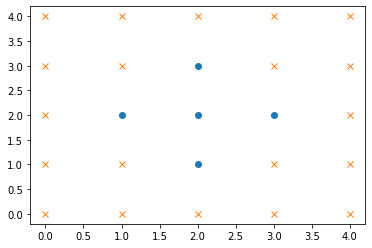

In [ ]:
# You can type in the code here for plotting the data above. Replace the array below with the data in the array above.
#
# Make sure how you understand how to  turn the table above into a plot like this, manually.
# Here's an example:
# x  y   c
# -  -  ---
# 0  0  0  ---> x,y coordinate = (0, 0) : mark this as 'x'
# 1  5  1  ---> x,y coordinate = (1, 5) : mark this as 'o'
# 2  1  0  ... etc
# 3  2  1

# import some necessary packages
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0, 0, 0, 0, 
              1, 1, 1, 1, 1, 
              2, 2, 2, 2, 2,
              3, 3, 3, 3, 3,
              4, 4, 4, 4, 4])
y = np.array([0, 1, 2, 3, 4,
              0, 1, 2, 3, 4,
              0, 1, 2, 3, 4,
              0, 1, 2, 3, 4,
              0, 1, 2, 3, 4,])
c = np.array([0, 0, 0, 0, 0,
              0, 0, 1, 0, 0,
              0, 1, 1, 1, 0,
              0, 0, 1, 0, 0,
              0, 0, 0, 0, 0])
plt.plot(x[c == 1], y[c == 1], 'o', x[c == 0], y[c == 0], 'x')


# Section III. Gradient Descent (30 pt)

**Problem 4 (Written: 5 pts):** Given an error function 
$$E(w) = \frac{1}{40}w(w+1)(w-8)(w-10),$$
find:
$$\frac{\partial E(w)}{\partial w}.$$
Note that this is simply an ordinary derivative $\frac{dE}{dw}$. Do not use Wolfram Alpha or similar package.

**Answer:**

$\frac{\partial E(w)}{\partial w} = \frac{1}{40}(4w^3-51w^2+124w+80)$

**Problem 5 (Written: 5 pts):**
(1) How many minima does $E(w)$ have? You can draw a rough plot from $w=-4$ to $12$. (2) Which is/are the local minimum/minima that isn't/aren't a global minimum? (3) How can we set the value of initial $w$, so that $w$ can converge to the local minimum/minima discussed in (2)?

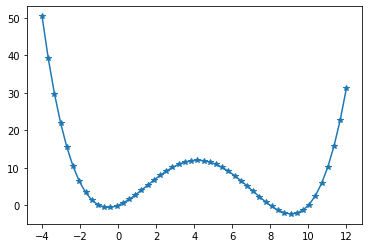

In [ ]:
# Example: modify the function
def E_test(w):
    return w*(w+1)*(w-8)*(w-10)/40


w = np.linspace(-4, 12, 50)

# IMPLEMENT : for the problem 4 function, use the following range:
# w = np.linspace(-4,12,50)
plt.plot(w, E_test(w), '*-')


**Answer:**

(1) Two minima

(2) The left one ($w≈-0.5$)

(3) initial $w < 4$ (approximately)

**Problem 6 (Written: 5 pts):** With $\frac{\partial E(w)}{\partial w}$ calculated above, if you want to adjust $w$ to minimize $E(w)$, what should $\Delta w$ be (include the learning rate $\eta$)? Write the answer as a polynomial function of $w$. (This is trivial, given the answer to problem 4. Be careful with the sign.)

Answer: 

$\Delta w = -η\frac{\partial E(w)}{\partial w} = -η\frac{1}{40}(4w^3-51w^2+124w+80)$

**Problem 7 (Program: 10 pts):**
Using the gradient found above, write a short program to

1. Initialize $w$ to a particular value $w_0=...$.

2. Repeat
$$w \leftarrow w + \Delta w $$ for 1000 steps. Set $\eta = 0.1$.

3. If you plot the function within a range of -4 and 12, you can see the shape the best(this is important: otherwise it is a bit hard to interprete the results). See the example below and the sample code.  

4. Try different initial value $w_0$ and confirm that the final $w$ values are the same for those that end up in the same local/global minumum. Give two examples $w$ values that lead to a local minumum, and two that lead to the global minumum.

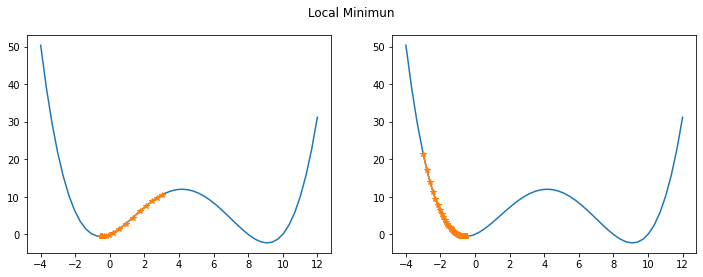

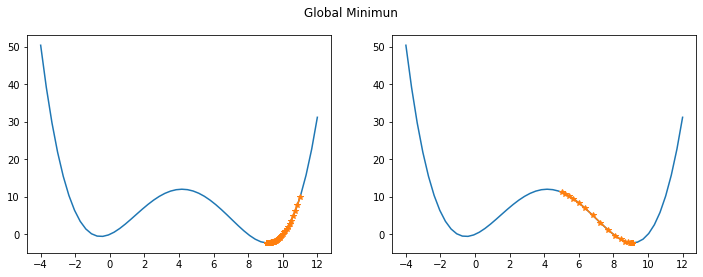

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
    # note: np.power() can take scalar or vector as argument.
    return w*(w+1)*(w-8)*(w-10)/40

# 2. define derivative function
def dEdw(w):
    return (4*w**3 - 51*w**2 + 124*w + 80)/40

# 3. gradient descent
def gradient_descent(w, eta, n):
    # w = 1     # initial value
    # eta = 0.1   # learning rate  : try eta = 0.2 , and eta=0.001
    # n = 1000

    w_t = np.zeros(n)
    Ew_t = np.zeros(n)

    end_idx = 0
    for i in range(n):

        # collect w_t and Ew_t values for plotting
        w_t[i] = w
        Ew_t[i] = E(w)

        end_idx = i  # book keeping

        # IMPLEMENT the line below: gradient descent step
        DeltaW = -1 * eta * dEdw(w)
        w = w + DeltaW
    return (w_t, Ew_t)
local_1 = gradient_descent(3, 0.1, 1000)
local_2 = gradient_descent(-3, 0.01, 1000)
global_1 = gradient_descent(11, 0.01, 1000)
global_2 = gradient_descent(5, 0.1, 1000)
# 4. plot E(w) and the gradient descent steps
x = np.linspace(-4,12,50)

# Note: initially, this will only show one point, at w=0.5.

fig1, ax1 = plt.subplots(1, 2, figsize=[12,4])
fig1.suptitle('Local Minimun')
ax1[0].plot(x, E(x), '-', local_1[0][:], local_1[1][:], '*-')
ax1[1].plot(x, E(x), '-', local_2[0][:], local_2[1][:], '*-')

fig2, ax2 = plt.subplots(1, 2, figsize=[12,4])
fig2.suptitle('Global Minimun')
ax2[0].plot(x, E(x), '-', global_1[0][:], global_1[1][:], '*-')
ax2[1].plot(x, E(x), '-', global_2[0][:], global_2[1][:], '*-')


**Problem 8 (Written: 5 pts):**
Using chain rule, find the gradient for the function $\sigma(E(w))$ where
$\sigma(x) = \frac{1}{1+\exp(-x)}$ and $E(w)$ is defined above (Problem 4):
$$\frac{d\sigma(E(w))}{dw}.$$
Write the answer as a function of $w$. Do not use Wolfram Alpha or similar package (you'll get a mathematically equivalent equation but it will be much more complex). If you do that you will get no credit.

**Hint:** $\frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$.



**Answer:**

$\frac{d \sigma(E(w))}{dw} = \frac{d \sigma(E(w))}{dE(w)}\frac{dE(w)}{dw} = \sigma(E(w))(1-\sigma(E(w))) \frac{dE(w)}{dw}$


# Section IV. Backpropagation 1 (25 pt)

**Problem 9 (Program: 15 pts):**

For this problem, use Keras with TensorFlow to train the data set shown in Problem 3 from scratch. Experiment with different network configurations, and report the results. 

(1) Single layer network;

(2) Two layer networks: Try 2 hidden units, 3 hidden units, and 4 hidden units. In all cases, output unit is 1. 

(3) Analyze the weights and plot the decision boundary (you’ll get a bunch of line equations). Or, alternatively, you can plot the activation value of each hidden or output unit (if you had 3 hidden and 1 output unit, you will need to show 4 such plots in total). For the input, generate a mesh grid of finer grain than the grid in the  Problem 3 data set (see python example below), and then compute the hidden activity.



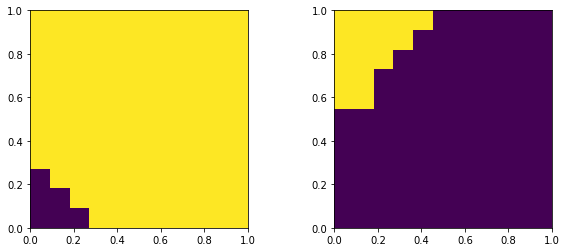

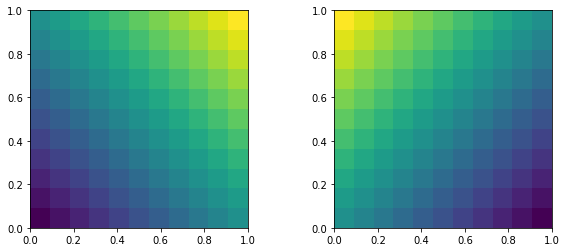

In [ ]:
# This shows how to create the input vectors in a systematic manner, for testing. Suppose a
# well trained neural network has one hidden layer. This hidden layer has two
# neurons: weights [w_1, W2]= [[1, 1], [-1, 1]], biases [b_1, b_2] = [-0.3, -0.5].
# We want to plot decision boundaries for hidden neurons' output >= 0.
import numpy as np
import matplotlib.pyplot as plt

step_size = 0.1
start = 0.
end = 1.

# generate a input meshgrid
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# note: for simplicity, here it is assumed that the hidden layer uses linear activation function.
w11, w12, b1 = 1, 1, -0.3
w21, w22, b2 = -1, 1, -0.5
h1 = w11 * xx + w12 * yy + b1
h2 = w21 * xx + w22 * yy + b2

# plot using imshow : with thresholding
# - be careful with x-y range (extent = ...) and the orientation (origin = ...)
thresh = 0

fig1 = plt.figure(figsize=[10, 4])
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plt.sca(ax1)
plt.imshow(h1 > thresh, extent=[start, end, start, end], origin='lower')

plt.sca(ax2)
plt.imshow(h2 > thresh, extent=[start, end, start, end], origin='lower')

# plot, without thresholding
fig2 = plt.figure(figsize=[10, 4])
ax3 = plt.subplot(1, 2, 1)
ax4 = plt.subplot(1, 2, 2)

plt.sca(ax3)
plt.imshow(h1, extent=[start, end, start, end], origin='lower')

plt.sca(ax4)
plt.imshow(h2, extent=[start, end, start, end], origin='lower')


In [ ]:
# Simple functioning code for the XOR problem.
# - You will have to use the data from problem 3 to modify the code below.
# - You may also have to change some other parts, like learning rate, number of epochs, batch size, etc.
# - experiment with it.

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# config
eta = 0.05  # learning rate
num_epochs = 1000
b_size = 2  # batch size

# data
x = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4],
     [1, 0], [1, 1], [1, 2], [1, 3], [1, 4],
     [2, 0], [2, 1], [2, 2], [2, 3], [2, 4],
     [3, 0], [3, 1], [3, 2], [3, 3], [3, 4],
     [4, 0], [4, 1], [4, 2], [4, 3], [4, 4],]
y =  [0, 0, 0, 0, 0,
      0, 0, 1, 0, 0,
      0, 1, 1, 1, 0,
      0, 0, 1, 0, 0,
      0, 0, 0, 0, 0]
x_train = np.array(x)
y_train = np.array(y)
x_test = x_train
y_test = y_train

# model configuration
num_layers = 2
hidden_size = 4
input_dim = 2
output_dim = 1
hidden_activation = 'sigmoid'
output_activation = 'sigmoid'

# define model architecture
model = Sequential()
for i in range(num_layers - 1):  # add hidden layer(s)
    if i == 0:
        model.add(Dense(hidden_size, input_dim=input_dim,
                  activation=hidden_activation))
    else:
        model.add(Dense(hidden_size, activation=hidden_activation))
model.add(Dense(output_dim, activation=output_activation))  # add output layer

# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=eta)

# build model
model.compile(loss='mean_squared_error',  # loss defines the error function E()
              optimizer=opt,
              metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

# train & evaluate
model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
#score = model.evaluate(x_test, y_test, batch_size=b_size)

# retrieve results
x_test = x_train
final = Model(inputs=model.input, outputs=model.layers[-1].output)
final_output = final.predict(x_test)

print(final_output)

# Make sure the final output is something like:
# [[0.00584927]
#  [0.9912248 ]
#  [0.991363  ]
#  [0.00513098]]
# which is close to [0, 1, 1, 0], the correct y_test value.


# Note: depending on the initial weights, this may not converge to the correct solution.
# - in that case, run it again.


Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2102 - mean_absolute_error: 0.4455
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1713 - mean_absolute_error: 0.3444
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1624 - mean_absolute_error: 0.3048
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1614 - mean_absolute_error: 0.3051
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1607 - mean_absolute_error: 0.3162
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1613 - mean_absolute_error: 0.3304
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1608 - mean_absolute_error: 0.3184
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - mean_absolute_error: 0.3102
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1580 - mean_absolute_error: 0.3092
E

Layer 1 plots:


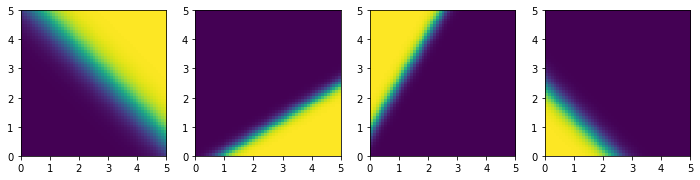

Layer 2 plots:


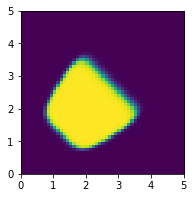

In [ ]:
# Generate mesh of (x,y) values to test.
# - although we used only 0 and 1 in training, we can plug in input in the full 0:1 range.

step_size = 0.1
start = 0.
end = 5.

# generate a input meshgrid
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# construct n x 2 array as input.
mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

# note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
for layer_idx in range(num_layers):
    print(f'Layer {layer_idx + 1} plots:')
    # Retrieve hidden layer activity
    final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    final_output = final.predict(mesh_input)
    num_hidden_units = final_output.shape[1]
    
    if layer_idx == num_layers-1:
        plt.figure(figsize=[3, 3])
    else:
        plt.figure(figsize=[12, 3])
    for hidden_unit_idx in range(num_hidden_units):
        # Plots etrieves all i-th hidden unit activation values
        ax = plt.subplot(1, num_hidden_units, hidden_unit_idx+1)
        plt.sca(ax)
        ax.matshow(final_output[0:, hidden_unit_idx].reshape(51, 51),
                    extent=[start, end, start, end], origin='lower')
        plt.gca().xaxis.tick_bottom()
    plt.show()


**Answer:**

The parameter for all models: \\
learning rate: 0.05; epoch: 1000; batch size: 2 \\
1. Model = \[1, sigmoid\] \\
loss: $0.1637$; mean absolute error: $0.3467$ \\
output layer: \\
![](https://drive.google.com/uc?export=view&id=1yMadgINe4LIceJGpM4TIWNQiLPme3uLc) \\
2. Model = \[2, sigmoid: 1, sigmoid\] \\
loss: $0.1101$; mean absolute error: $0.2206$ \\
hidden layers: \\
![](https://drive.google.com/uc?export=view&id=12FWptHnmeB9JO7UF7X8wZzDLK33leosI) \\
output layer: \\
![](https://drive.google.com/uc?export=view&id=148QHKjNr3UwaonCUDFsij8R4QNQAWsMH) \\
3. Model = \[3, sigmoid: 1, sigmoid\] \\
loss: $0.0348$; mean absolute error: $0.0692$ \\
hidden layers: \\
![](https://drive.google.com/uc?export=view&id=1W_WsPM4lIKi5eRp6jlsFve1hzosux3iF) \\
output layer: \\
![](https://drive.google.com/uc?export=view&id=1nQTDZC3DnRd_tG94wSYj6CGeC9ecErjt) \\
4. Model = \[4, sigmoid: 1, sigmoid\] \\
loss: $7.923\times10^{-6}$; mean absolute error: $0.0014$ \\
hidden layers: \\
![](https://drive.google.com/uc?export=view&id=1uMg_-l4kmQQOOMlhXrwnJeDOhgbh2ega) \\
output layer: \\
![](https://drive.google.com/uc?export=view&id=1dlNoV-9RbBLPs33XbGRbbvGph38q-TSP) \\

The results demonstrate that a single perceptron can only represent a linearly separable function. Therefore, to classify the training data without error, there should be at least four hidden units.

**Problem 10 (Program: 10 pts):** Again, use Keras with TensorFlow. Implement sine function approximation from scratch. The training and test data are generated as below.

(1) Experiment with different network configurations: Two layers (5 hidden units, 10 hidden units, 30 hidden units), Three layers (1st hidden layer: 5 hidden units, 2nd hidden layer: 3 hidden units  ; and   1st hidden layer: 20 units, 2nd: 3 units).

(2) Plot each unit's activities in the last hidden layers (right before the output layer) in each of your models. Explain how the different number of hidden layers and number of hidden units affect the accuracy of the model, and how the hidden representations contribute to the final outcome.

(3) Run your models by slightly extending the original test set (for example, input from $[-6\pi, 6\pi]$, so that the x-range goes beyond that of the training set). Explain why the out-of-range portions behave in the way that you observe. 

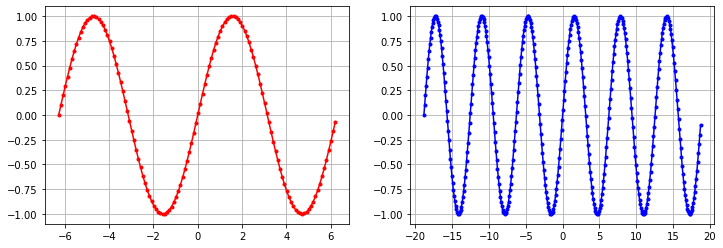

In [ ]:
# Important Note:
#
# In this case, "x" is the input and "y" is the target value!
#
# Do not confuse this with the classification case, where you had "(x,y)"" as input
# and "c" as target value.
import numpy as np
import matplotlib.pyplot as plt

x_train = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
y_train = np.sin(x_train)
x_test = x_train
y_test = y_train
x_extend = np.arange(-6 * np.pi, 6 * np.pi, 0.1)
y_extend = np.sin(x_extend)

plt.figure(figsize=[12, 4])
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plt.sca(ax1)
plt.plot(x_train, y_train, marker='.', color='r', linestyle='-')
plt.grid()

plt.sca(ax2)
plt.plot(x_extend, y_extend, marker='.', color='b', linestyle='-')
plt.grid()


In [ ]:
# You can modify the XOR example code above to train and test on the sin(x) data. 
# - Note that you may have to use a different metric, since this is a regression (accuracy is for classification).
# - Use MeanAbsoluteError as shown below. 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
# config
eta = 0.001  # learning rate
num_epochs = 5000
b_size = 10  # batch size

# model configuration
num_layers = 3
hidden_size = [20, 3]
input_dim = 1
output_dim = 1
hidden_activation = 'tanh'
output_activation = 'linear'

# define model architecture
model = Sequential()
for i in range(num_layers - 1):  # add hidden layer(s)
    if i == 0:
        model.add(Dense(hidden_size[i], input_dim=input_dim,
                  activation=hidden_activation))
    else:
        model.add(Dense(hidden_size[i], activation=hidden_activation))
model.add(Dense(output_dim, activation=output_activation))  # add output layer

# build model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(eta),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# train & evaluate
model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
score = model.evaluate(x_test, y_test, batch_size=b_size)

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.3848e-04 - mean_absolute_error: 0.0145
Epoch 2503/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.4063e-04 - mean_absolute_error: 0.0152
Epoch 2504/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.1155e-04 - mean_absolute_error: 0.0142
Epoch 2505/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.2652e-04 - mean_absolute_error: 0.0149
Epoch 2506/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.1130e-04 - mean_absolute_error: 0.0145
Epoch 2507/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.3063e-04 - mean_absolute_error: 0.0142
Epoch 2508/5000
13/13 [==============================] - 0s 2ms/step - loss: 2.6983e-04 - mean_absolute_error: 0.0134
Epoch 2509/5000
13/13 [==============================] - 0s 2ms/step - loss: 3.4542e-04 - mean_absolute_error: 0.0147
Epoch

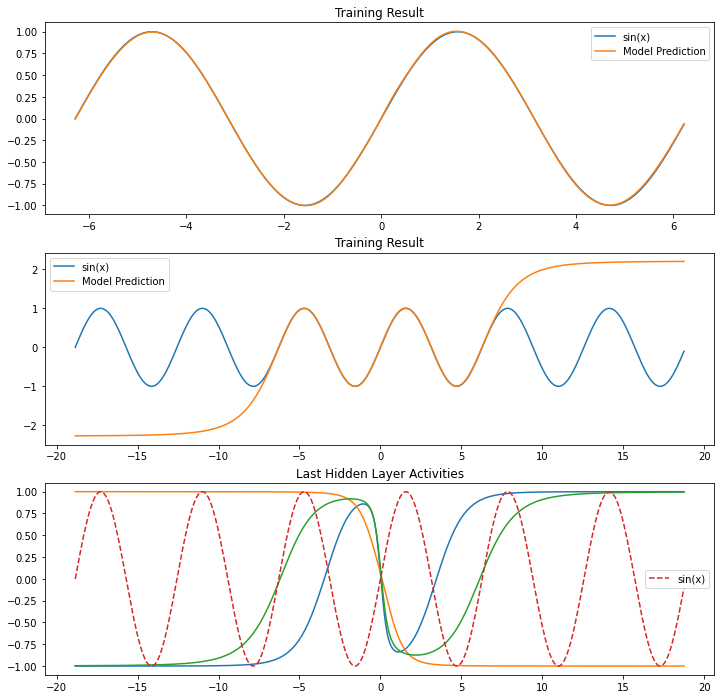

<Figure size 432x288 with 0 Axes>

In [ ]:
final = Model(inputs=model.input, outputs=model.layers[-1].output)
final_pre_train = final.predict(x_test)
final_pre_extend = final.predict(x_extend)

plt.figure(figsize=[12, 12])
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

plt.sca(ax1)
ax1.set_title("Training Result")
plt.plot(x_train, y_train, '-', label="sin(x)")
plt.plot(x_train, final_pre_train, '-', label="Model Prediction")
plt.legend()

plt.sca(ax2)
ax2.set_title("Training Result")
plt.plot(x_extend, y_extend, '-', label="sin(x)")
plt.plot(x_extend, final_pre_extend, '-', label="Model Prediction")
plt.legend()

last_hidden = Model(inputs=model.input, outputs=model.layers[-2].output)
last_hidden_extend = last_hidden.predict(x_extend)
num_hidden_units = last_hidden_extend.shape[1]
plt.figure()
for i in range(num_hidden_units):
  plt.sca(ax3)
  plt.plot(x_extend, last_hidden_extend[:, i], '-')
plt.sca(ax3)
plt.plot(x_extend, y_extend, linestyle='--', label="sin(x)")
ax3.set_title("Last Hidden Layer Activities")
plt.legend()

**Answer:**

The parameter for all models: \\
learning rate: 0.001; epoch: 5000; batch size: 10 \\
1. Model = \[5, tanh: 1, linear\] \\
loss: $0.0094$; mean absolute error: $0.0727$ \\
![](https://drive.google.com/uc?export=view&id=1O_3NOOwiXzopK9HjetL07SjFi1GjJMEL) \\
2. Model = \[10, tanh: 1, linear\] \\
loss: $0.0070$; mean absolute error: $0.0551$ \\
![](https://drive.google.com/uc?export=view&id=1finY31QALlxjL7bx0Sx9d6oHy82bqyFd) \\
3. Model = \[30, tanh: 1, linear\] \\
loss: $0.0019$; mean absolute error: $0.0317$ \\
![](https://drive.google.com/uc?export=view&id=1hZdcRp-WvIDDQSMvp-qNuYKBQwGloXS6) \\
4. Model = \[5, tanh: 3, tanh: 1, linear\] \\
loss: $0.0041$; mean absolute error: $0.0515$ \\
![](https://drive.google.com/uc?export=view&id=1p0q8Zk2d_Gu7BtNsoSq_-BWPH7zu5TRb) \\
5. Model = \[20, tanh: 3, tanh: 1, linear\] \\
loss: $4.2993\times10^{-5}$; mean absolute error: $0.0053$ \\
![](https://drive.google.com/uc?export=view&id=19WUtnjrvTvC-PQTqB4Mdje0do05KsnIO)

(2) The final outcome is the linear combination of all the hidden representations. According to the results, when increasing the number of hidden units and the number of hidden layers, the accuracy will increase. Both methods would increase the complexity of hypothesis. 

1. Increase the number of hidden units: \\
According to two layers models, when using more hidden units, more elements are used to fit the training data.
2. Increase the number of hidden layers: \\
According to three layers models, the outputs of the second layer are more complex. The model can learn more complex pattern to fit the training data.

(3) The model is trained to fit training data, not to understand sine function. Therefore, when the input range goes beyond that of the training set, the model could not fit it. This result demostrate that machine learning models closely depend on training data.





# Section V. Backpropagation 2 (20 pt)



**Problem 11 (Program: 20 pt)** 

Build a multilayer neural network to learn the spiral data set below. Use as many layers as needed. 

(1) Write the code, using the code above (example code for XOR).

(2) Design an appropriate network architecture (number of layers, number of units in each layer, activation function type[link text](https://) [first try tanh]), and train the network to reach high accuracy (> 95%). Note: There will be only one output unit, which outputs +1 for positive, and -1 for negative. 

(3) Plot the decision boundary of all the hidden units and the output unit (write code to do this, for arbitrary number of layers and neurons). Hint: see https://playground.tensorflow.org for example. No need to plot the connections. Just plot 1st hidden layer in the first row, 2nd hidden layer in the second row, etc. See example below:

```
[  ] [  ] [  ] [  ]  : hidden layer 1 boundaries
[  ] [  ] [  ]       : hidden layer 2 boundaries
...
...
[  ] : output layer
```

(4) Explain how adding more layers allows the multilayer network to learn more complex decision boundaries, referring to your answer to (3) above. 

Epoch 1/1000
26/26 [==============================] - 1s 2ms/step - loss: 0.9596 - mean_absolute_error: 0.9198
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9303 - mean_absolute_error: 0.9406
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.9273 - mean_absolute_error: 0.9361
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9294 - mean_absolute_error: 0.9345
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9264 - mean_absolute_error: 0.9334
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9316 - mean_absolute_error: 0.9329
Epoch 7/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9214 - mean_absolute_error: 0.9356
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9204 - mean_absolute_error: 0.9301
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.9204 - mean_absolute_error: 0.9304
E

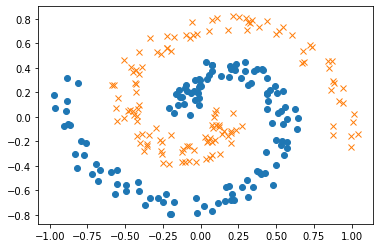

In [ ]:
''' Spiral data set'''
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
# config
rand_factor = 1.5


def spiral_1(t):
    '''parametric curve of a spiral : clockwise'''
    dat = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
    noise = np.random.rand(2, len(dat[0, :]))*rand_factor
    return (dat+noise-0.5)/7.5


def spiral_2(t):
    '''parametric curve of a spiral : counter-clockwise'''
    dat = np.array([-(t+1)*np.sin(t+5), -(t+1)*np.cos(t+5)])
    noise = np.random.rand(2, len(dat[0, :]))*rand_factor
    return (dat+noise-0.5)/7.5

# ---------------------
# DATA:
#  pos_dat is positive data (output = +1)
#  neg_dat is negative data (output = +1)
#
#  Note: pos_dat([:, 0]) is the input x values (column vector), and
#        pos_dat([:, 1]) is the input y values (column vector).
#        pos_dat([k, :]) is the single sample (x_k, y_k), and the target
#                       value would be '+1' (since this is the positive set)
# ---------------------


# Set data range
t = np.arange(0, 2*np.pi, 0.05)

pos_dat = np.transpose(spiral_1(t))
neg_dat = np.transpose(spiral_2(t))
# ---------------------
# Plot the data:
#   plotting all rows:
# --------------------- each row is the x,y coordinate
plt.plot(pos_dat[:, 0], pos_dat[:, 1], 'o', neg_dat[:, 0], neg_dat[:, 1], 'x')


''' 
IMPLEMENT your neural network below
'''
# to construct the data set, first you can concatenate pos_dat and neg_dat,
# and then set the target value vector to [1, 1, 1, 1, 1, 1, ...., 1, -1, -1, -1, -1, -1, ...., -1].

# config
eta = 0.001  # learning rate
num_epochs = 1000
b_size = 10  # batch size

# data
x_train = np.concatenate((pos_dat, neg_dat), axis=0)
pos = np.ones(pos_dat.shape[0])
neg = np.ones(neg_dat.shape[0]) * -1
y_train = np.concatenate((pos, neg), axis=0)
x_test = x_train
y_test = y_train

# model configuration
num_layers = 7
hidden_size = 8
input_dim = 2
output_dim = 1
hidden_activation = 'tanh'
output_activation = 'tanh'

# define model architecture
model = Sequential()
for i in range(num_layers - 1):  # add hidden layer(s)
    if i == 0:
        model.add(Dense(hidden_size, input_dim=input_dim,
                  activation=hidden_activation))
    else:
        model.add(Dense(hidden_size, activation=hidden_activation))
model.add(Dense(output_dim, activation=output_activation))  # add output layer

# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=eta)

# build model
model.compile(loss='mean_squared_error',  # loss defines the error function E()
              optimizer=opt,
              metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

# train & evaluate
model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
score = model.evaluate(x_test, y_test, batch_size=b_size)

# retrieve results
x_test = x_train
final = Model(inputs=model.input, outputs=model.layers[-1].output)
final_output = final.predict(x_test)
# Calculate accuracy
final_output = final_output.reshape(-1)
num_data = final_output.shape[0]
for i in range(num_data):
  final_output[i] = -1 if final_output[i] <= 0 else 1
accuracy = (final_output == y_test).sum() / num_data 
print("accuracy: %.2f%%" %(accuracy*100))


Layer 1 plots:


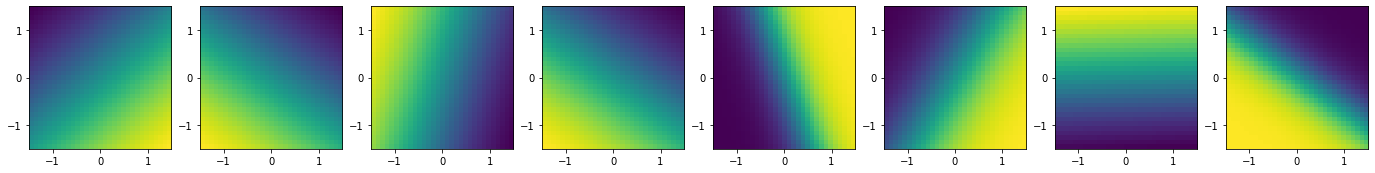

Layer 2 plots:


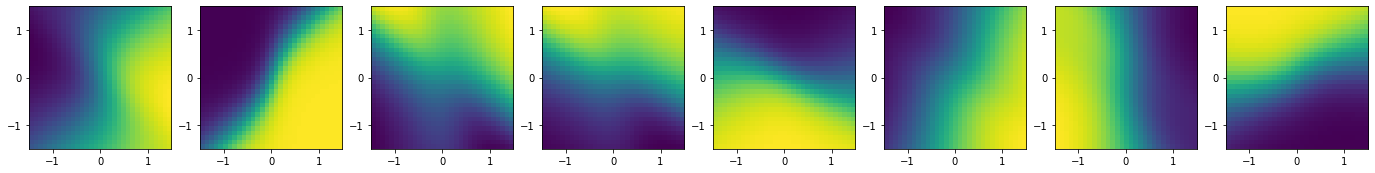

Layer 3 plots:


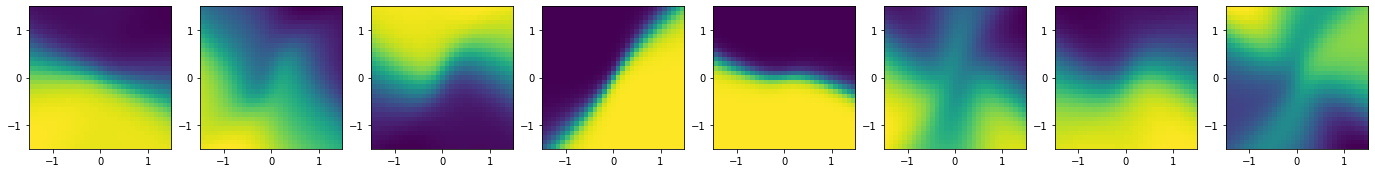

Layer 4 plots:


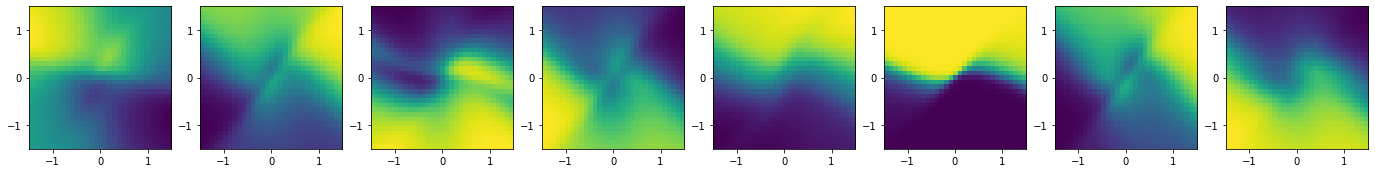

Layer 5 plots:


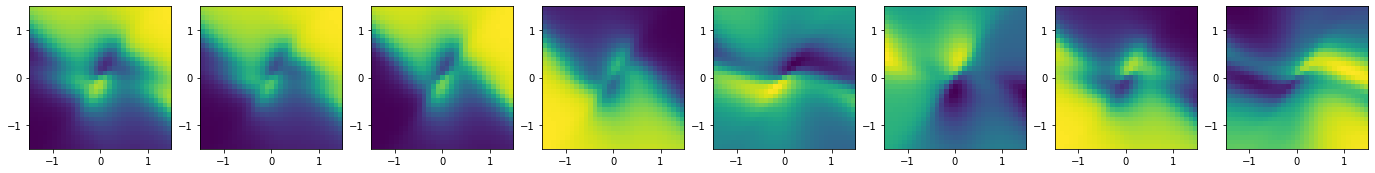

Layer 6 plots:


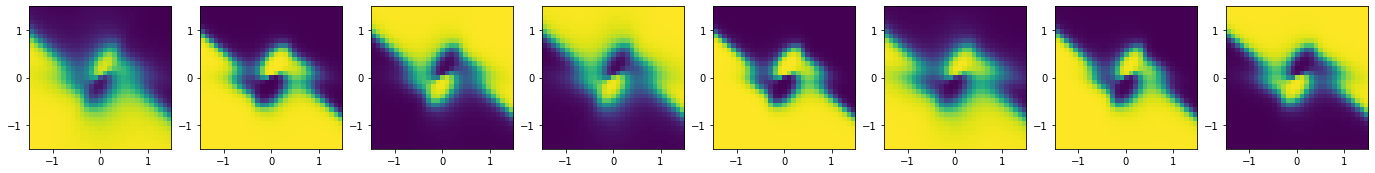

Layer 7 plots:


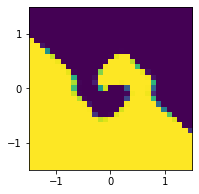

In [ ]:
step_size = 0.1
start = -1.5
end = 1.5
num_layers = 7

# generate a input meshgrid
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# construct n x 2 array as input.
mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

# note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
for layer_idx in range(num_layers):
    print(f'Layer {layer_idx + 1} plots:')
    # Retrieve hidden layer activity
    final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    final_output = final.predict(mesh_input)
    num_hidden_units = final_output.shape[1]
    if layer_idx == num_layers-1:
        plt.figure(figsize=[3, 3])
    else:
        plt.figure(figsize=[24, 3])
    for hidden_unit_idx in range(num_hidden_units):
        # Plots etrieves all i-th hidden unit activation values
        ax = plt.subplot(1, num_hidden_units, hidden_unit_idx+1)
        plt.sca(ax)
        ax.matshow(final_output[0:, hidden_unit_idx].reshape(31, 31),
                    extent=[start, end, start, end], origin='lower')
        plt.gca().xaxis.tick_bottom()
    plt.show()

**Answer:**

Model with 6 hidden layers (each has 8 hidden units) and a output layer

The parameters of training: \\
learning rate: 0.001; epoch: 1000; batch size: 10 \\

Accuracy: 100\%

hidden layer 1: \\
![](https://drive.google.com/uc?export=view&id=184qcvYVYOLPTM2C9vWRBPuSlp9iNKfXF) \\
hidden layer 2: \\
![](https://drive.google.com/uc?export=view&id=1pA60Z27TiIH0LIOE17FQ5tjHfzj0JbWZ) \\
hidden layer 3: \\
![](https://drive.google.com/uc?export=view&id=1ayKASYXkVm40En62K0K2XKO8_XGLfo5O) \\
hidden layer 4: \\
![](https://drive.google.com/uc?export=view&id=1hIaeYB35W7e08Ssg_u48FQ3ISwXzYRMx) \\
hidden layer 5: \\
![](https://drive.google.com/uc?export=view&id=1UVGrIPrV4gYXcxk0T99pEY4nHg1DgqJc) \\
hidden layer 6: \\
![](https://drive.google.com/uc?export=view&id=1X1sxhxbTionQJ1-JuBrztyUl4sqHKyp6) \\
output layer: \\
![](https://drive.google.com/uc?export=view&id=1n1L7HiVeu7bXJLMogYgog1VJvPPHYlQz) \\

According to the results, the decision boundary of deeper layers are more complex. The ouputs of first layers are linear bounday because there is a single perceptron. However, the outputs of deeper layers are the combination of previous layers' outputs. Therefore, every time adding a hidden layer, the decision boundry would be more complex.

